In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_excel('Data_Train.xlsx')

In [3]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
col_names = data.columns

In [6]:
col_names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
df = pd.DataFrame(data)

In [10]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [12]:
# parse the dates, currently coded as strings, into datetime format

df['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [13]:
# Extract month from date

df['Month'] = df['Date_of_Journey'].dt.month

df['Month'].head()

0     3
1     1
2     9
3    12
4     1
Name: Month, dtype: int64

In [14]:
# Extract day from date

df['Day'] = df['Date_of_Journey'].dt.day

df['Day'].head()

0    24
1     5
2     6
3     5
4     3
Name: Day, dtype: int64

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
df.drop('Date_of_Journey',inplace=True,axis=1)

In [17]:
df['Dep_Time'].dtypes

df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [18]:
# Extract Hour from Time

df['Dep_hour'] = df['Dep_Time'].dt.hour

df['Dep_hour'].head()

0    22
1     5
2     9
3    18
4    16
Name: Dep_hour, dtype: int64

In [19]:
# Extract Min from Time

df['Dep_min'] = df['Dep_Time'].dt.minute

df['Dep_min'].head()

0    20
1    50
2    25
3     5
4    50
Name: Dep_min, dtype: int64

In [20]:
df.drop('Dep_Time',inplace=True,axis=1)

In [21]:
# Now, we take care of Arrival_Time

df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour

df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop('Arrival_Time', axis = 1, inplace = True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
df.drop('Duration',inplace=True,axis=1)

In [24]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
df.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35


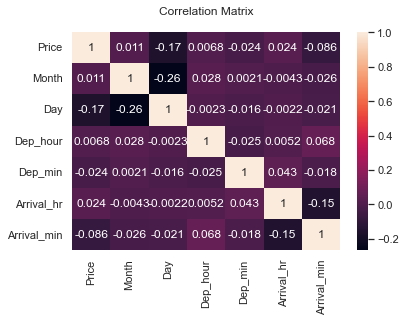

In [28]:
plt.title('Correlation Matrix\n')

sns.heatmap(df.corr(),annot=True)

plt.show()

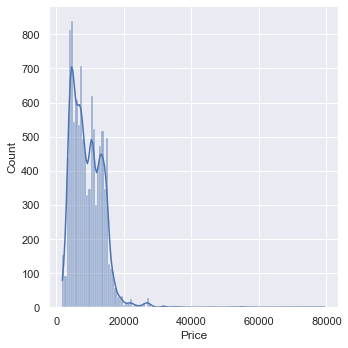

In [29]:
# Distribution plot of column

sns.displot(df["Price"],kde=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
categorical_columns = ['Airline', 'Source', 'Destination']

# Apply label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_min,Arrival_hr,Arrival_min
0,3,0,5,non-stop,3897,3,24,22,20,1,10
1,1,3,0,2 stops,7662,1,5,5,50,13,15
2,4,2,1,2 stops,13882,9,6,9,25,4,25
3,3,3,0,1 stop,6218,12,5,18,5,23,30
4,3,0,5,1 stop,13302,1,3,16,50,21,35


In [33]:
# As this is case of Ordinal Categorical data, we can perform LabelEncoder
# Here values are assigned with corresponding keys

df['Total_Stops'] = df['Total_Stops'].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
                                                     )

In [34]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_min,Arrival_hr,Arrival_min
0,3,0,5,0,3897,3,24,22,20,1,10
1,1,3,0,2,7662,1,5,5,50,13,15
2,4,2,1,2,13882,9,6,9,25,4,25
3,3,3,0,1,6218,12,5,18,5,23,30
4,3,0,5,1,13302,1,3,16,50,21,35


In [36]:
X = df.drop('Price', axis=1)     

y = df['Price']        # Target Variable

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 355)

In [38]:
### Standarization of Dataset

scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)

x_test = scalar.transform(x_test)

### Random Forest Without HyperParameter Tunning

In [41]:
ran_forest = RandomForestRegressor(random_state=6)

In [42]:
ran_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=6)

In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(ran_forest.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(ran_forest.score(x_test, y_test)))

Training set score: 0.9543
Test set score: 0.7742


### Now lets try Random Forest with HyperParameter Tunning

In [44]:
n_estimators = [5,20,50,100,90,115,130] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = range(2,20,1) # maximum number of levels allowed in each decision tree
min_samples_split = range(2,10,1)  # minimum sample number to split a node
min_samples_leaf = range(1,10,1) # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [46]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [48]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 20, 50, 100, 90,
                                                         115, 130]},
                   random_state=35, verbose=2)

In [49]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 90, 115, 130], 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10), 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 14, 'bootstrap': True}  



In [50]:
rand_reg = RandomForestRegressor( max_depth = 14,
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split= 6,
 n_estimators = 100,random_state=6)

In [51]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=2, min_samples_split=6,
                      random_state=6)

In [52]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rand_reg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rand_reg.score(x_test, y_test)))

Training set score: 0.9058
Test set score: 0.8087


In [53]:
predy_rf = rand_reg.predict(x_test)

In [54]:
from sklearn.metrics import r2_score

r_squared_rf = r2_score(y_test, predy_rf)

r_squared_rf

0.8087306042871212

In [55]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [56]:
rmse_rf = sqrt(mean_squared_error(y_test,predy_rf))      # It is for testing

rmse_rf

1993.0463031785046

In [57]:
import pickle as pk     # to save the model

In [58]:
filename = "flight_price_rf.pk"

pk.dump(rand_reg,open(filename,"wb")) 